In [431]:
import pandas as pd
import matplotlib.pyplot as plt

In [432]:
# df = pd.read_excel('taabi_dataset.xlsx')
# df.sample(5)

In [433]:
# #converting data from .xlsx into .csv
# df.to_csv('Taabi_data.csv', index =False)


In [434]:
data = pd.read_csv('Taabi_data.csv')
data.sample(5)

uniqueid          ts        lat        lng  external_bat_voltage  \
13999  it_220403501  1712705913  18.866541  79.017746                   NaN   
11800  it_220403501  1712326529  19.026829  79.460060                   NaN   
5767   it_220403501  1711093744  19.069044  78.355232                   NaN   
9780   it_220403501  1711817706  18.292028  79.136902                   NaN   
10646  it_220403501  1712053028  18.827942  78.932076                   NaN   

       internal_bat_voltage  engineload  tanklevel  throttle  coolant  ...  \
13999                   NaN           0        NaN       NaN       89  ...   
11800                   NaN          83        NaN       NaN       90  ...   
5767                    NaN           0        NaN       NaN       55  ...   
9780                    NaN           0        NaN       NaN       84  ...   
10646                   NaN          62        NaN       NaN       87  ...   

       live_location  to_be_expired_at  status  event_id  \
13999            NaN               NaN     NaN       NaN   
11800            NaN               NaN     NaN       NaN   
5767             NaN               NaN     NaN       NaN   
9780             NaN               NaN     NaN       NaN   
10646            NaN               NaN     NaN       NaN   

       particulated_trap_inlet_pressure  boost_pressure  \
13999                               NaN             NaN   
11800                               NaN             NaN   
5767                                NaN             NaN   
9780                                NaN             NaN   
10646                               NaN             NaN   

       intake_manifold_1_temperature  air_inlet_pressure  \
13999                            NaN                 NaN   
11800                            NaN                 NaN   
5767                             NaN                 NaN   
9780                             NaN                 NaN   
10646                            NaN                 NaN   

       exhaust_gas_temperature  adblue_level  
13999                      NaN          88.4  
11800                      NaN          69.2  
5767                       NaN          88.4  
9780                       NaN         100.0  
10646                      NaN          99.2  

[5 rows x 141 columns]

In [435]:
data.shape

(18434, 141)

In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Columns: 141 entries, uniqueid to adblue_level
dtypes: float64(122), int64(13), object(6)
memory usage: 19.8+ MB


In [437]:
data.describe()

ts           lat           lng  external_bat_voltage  \
count  1.843400e+04  18434.000000  18434.000000                   0.0   
mean   1.711641e+09     18.724254     78.865351                   NaN   
std    1.275937e+06      0.816184      3.208032                   NaN   
min    1.709341e+09      0.000000      0.000000                   NaN   
25%    1.710903e+09     18.701308     78.758909                   NaN   
50%    1.711692e+09     18.853032     79.092408                   NaN   
75%    1.712682e+09     18.921385     79.352821                   NaN   
max    1.713636e+09     19.069500     79.481804                   NaN   

       internal_bat_voltage    engineload  tanklevel  throttle       coolant  \
count                   0.0  18434.000000        0.0       0.0  18434.000000   
mean                    NaN     38.141206        NaN       NaN     84.571336   
std                     NaN     29.889358        NaN       NaN      7.718346   
min                     NaN      0.000000        NaN       NaN     30.000000   
25%                     NaN     10.000000        NaN       NaN     83.000000   
50%                     NaN     31.000000        NaN       NaN     85.000000   
75%                     NaN     64.000000        NaN       NaN     89.000000   
max                     NaN    100.000000        NaN       NaN     98.000000   

       intakeairtemp  ...  live_location  to_be_expired_at  status  event_id  \
count            0.0  ...            0.0               0.0     0.0       0.0   
mean             NaN  ...            NaN               NaN     NaN       NaN   
std              NaN  ...            NaN               NaN     NaN       NaN   
min              NaN  ...            NaN               NaN     NaN       NaN   
25%              NaN  ...            NaN               NaN     NaN       NaN   
50%              NaN  ...            NaN               NaN     NaN       NaN   
75%              NaN  ...            NaN               NaN     NaN       NaN   
max              NaN  ...            NaN               NaN     NaN       NaN   

       particulated_trap_inlet_pressure  boost_pressure  \
count                               0.0             0.0   
mean                                NaN             NaN   
std                                 NaN             NaN   
min                                 NaN             NaN   
25%                                 NaN             NaN   
50%                                 NaN             NaN   
75%                                 NaN             NaN   
max                                 NaN             NaN   

       intake_manifold_1_temperature  air_inlet_pressure  \
count                            0.0                 0.0   
mean                             NaN                 NaN   
std                              NaN                 NaN   
min                              NaN                 NaN   
25%                              NaN                 NaN   
50%                              NaN                 NaN   
75%                              NaN                 NaN   
max                              NaN                 NaN   

       exhaust_gas_temperature  adblue_level  
count                      0.0  14770.000000  
mean                       NaN     84.795315  
std                        NaN     15.571199  
min                        NaN     44.400000  
25%                        NaN     68.800000  
50%                        NaN     88.400000  
75%                        NaN     99.200000  
max                        NaN    100.000000  

[8 rows x 135 columns]

In [438]:
#checking null values
data.isnull().sum()

uniqueid                             0
ts                                   0
lat                                  0
lng                                  0
external_bat_voltage             18434
                                 ...  
boost_pressure                   18434
intake_manifold_1_temperature    18434
air_inlet_pressure               18434
exhaust_gas_temperature          18434
adblue_level                      3664
Length: 141, dtype: int64

In [439]:
#There are most of the columns that has null values for all the rows in the dataset, we have to remove that as it is not going to contribute in further analysis
original_columns_count = data.shape[1]

# Remove columns that have all null values
data.dropna(axis=1, how='all',inplace = True)

# Check the shape of the cleaned DataFrame to verify columns were removed
print(f"Original number of columns: {original_columns_count}")
print(f"Number of columns after cleaning: {data.shape[1]}")


Original number of columns: 141
Number of columns after cleaning: 33


In [440]:
data.describe()

ts           lat           lng    engineload       coolant  \
count  1.843400e+04  18434.000000  18434.000000  18434.000000  18434.000000   
mean   1.711641e+09     18.724254     78.865351     38.141206     84.571336   
std    1.275937e+06      0.816184      3.208032     29.889358      7.718346   
min    1.709341e+09      0.000000      0.000000      0.000000     30.000000   
25%    1.710903e+09     18.701308     78.758909     10.000000     83.000000   
50%    1.711692e+09     18.853032     79.092408     31.000000     85.000000   
75%    1.712682e+09     18.921385     79.352821     64.000000     89.000000   
max    1.713636e+09     19.069500     79.481804    100.000000     98.000000   

       engineoiltemp  vehiclespeed           rpm   obddistance       runtime  \
count   1.843400e+04  18434.000000  18434.000000  1.843400e+04  18420.000000   
mean    1.774969e+03     33.361762    937.044090  6.650076e+07   2132.411732   
std     4.547597e-13     17.929579    327.003819  3.256334e+06     92.454295   
min     1.774969e+03      0.000000      0.000000  6.078080e+07   1970.850000   
25%     1.774969e+03     22.359375    757.250000  6.373487e+07   2053.300000   
50%     1.774969e+03     38.187500    950.812500  6.653239e+07   2133.125000   
75%     1.774969e+03     47.011719   1157.500000  6.940603e+07   2213.800000   
max     1.774969e+03     81.703125   2011.250000  7.187482e+07   2287.100000   

       ...  fuel_economy  accelerator_pedal_pos  vibration_status  \
count  ...  18434.000000           18434.000000           18434.0   
mean   ...     25.029692              34.954519               0.0   
std    ...     43.331629              34.994579               0.0   
min    ...      0.000000               0.000000               0.0   
25%    ...      1.933594               0.000000               0.0   
50%    ...      3.456055              32.800000               0.0   
75%    ...     20.906250              68.400000               0.0   
max    ...    125.500000             100.000000               0.0   

       engine_throttle_valve1_pos  engine_throttle_valve2_pos  enginefueltemp  \
count                18434.000000                     18434.0         18434.0   
mean                    99.657546                       102.0           215.0   
std                      3.934917                         0.0             0.0   
min                     21.200000                       102.0           215.0   
25%                    100.000000                       102.0           215.0   
50%                    100.000000                       102.0           215.0   
75%                    100.000000                       102.0           215.0   
max                    100.000000                       102.0           215.0   

       drivers_demand_engine_torque_percent  engine_torque_mode  \
count                          18434.000000        18434.000000   
mean                              28.044483            4.983780   
std                               28.824737            5.249083   
min                                0.000000            1.000000   
25%                                0.000000            1.000000   
50%                               23.000000            2.000000   
75%                               56.000000            9.000000   
max                               83.000000           15.000000   

       accelerator_pedal_pos_2  adblue_level  
count                  18434.0  14770.000000  
mean                     102.0     84.795315  
std                        0.0     15.571199  
min                      102.0     44.400000  
25%                      102.0     68.800000  
50%                      102.0     88.400000  
75%                      102.0     99.200000  
max                      102.0    100.000000  

[8 rows x 27 columns]

In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   uniqueid                              18434 non-null  object 
 1   ts                                    18434 non-null  int64  
 2   lat                                   18434 non-null  float64
 3   lng                                   18434 non-null  float64
 4   engineload                            18434 non-null  int64  
 5   coolant                               18434 non-null  int64  
 6   engineoiltemp                         18434 non-null  float64
 7   vehiclespeed                          18434 non-null  float64
 8   rpm                                   18434 non-null  float64
 9   obddistance                           18434 non-null  int64  
 10  runtime                               18420 non-null  float64
 11  engine_torque_p

In [442]:
#claculating percentage of missing values in the remaining columns
data.isnull().sum()/data.shape[0]*100

uniqueid                                 0.000000
ts                                       0.000000
lat                                      0.000000
lng                                      0.000000
engineload                               0.000000
coolant                                  0.000000
engineoiltemp                            0.000000
vehiclespeed                             0.000000
rpm                                      0.000000
obddistance                              0.000000
runtime                                  0.075947
engine_torque_percent                    0.000000
selected_gear                            0.000000
current_gear                             0.000000
fuel_consumption                         0.000000
fuel_level                               0.010850
fl_level                                 0.000000
fuel_rate                                0.000000
fuel_economy                             0.000000
accelerator_pedal_pos                    0.000000


In [443]:
#now we will take a count of duplicate data
duplicate_count = data.duplicated().sum()
print(f'Number of duplicate records: {duplicate_count}')

Number of duplicate records: 0


In [444]:
# import pandas as pd

# # Assuming your DataFrame is named data and the timestamp column is 'ts'
# # Convert the Unix timestamp to datetime
# data['ts'] = pd.to_datetime(data['ts'], unit='s')

# # Extract the minimum and maximum dates
# min_date = data['ts'].min()
# max_date = data['ts'].max()

# # Extract the year from the min and max dates
# min_year = min_date.date
# max_year = max_date.date

# print(f"Data spans from {min_year} to {max_year}")
# print(data['engineoiltemp'].unique())
for i in data.columns:
    minimum = data[i].min()
    maximum = data[i].max()
    print(f"for {i}: {minimum} to {maximum}")

for uniqueid: it_220403501 to it_220403501
for ts: 1709340731 to 1713636120
for lat: 0.0 to 19.0695
for lng: 0.0 to 79.481804
for engineload: 0 to 100
for coolant: 30 to 98
for engineoiltemp: 1774.9688 to 1774.9688
for vehiclespeed: 0.0 to 81.703125
for rpm: 0.0 to 2011.25
for obddistance: 60780800 to 71874816
for runtime: 1970.85 to 2287.1
for engine_torque_percent: 0 to 80
for selected_gear: 130 to 130
for current_gear: 0 to 129
for fuel_consumption: 17935.5 to 21059.0
for fuel_level: 0.4 to 100.0
for fl_level: 0.0 to 365.0
for fuel_rate: 0.0 to 36.4
for fuel_economy: 0.0 to 125.5
for accelerator_pedal_pos: 0.0 to 100.0
for pluscode: 6FG22222+ to 7JFX3C32+
for vibration_status: 0 to 0
for can_raw_data: 0CF00300:C0B109FFFF0C3F7E,0CF00400:7484841C2B000484,18FEF200:4100031FC006FAFF,18FEEE00:82FFFFFFFFFFFFFF,18FEE900:E0910000DC910000,18FE5600:7D50FFFF1F1F00FF,18FEE500:CA9F00008E1F0100,18FEF100:F32C320FFFFFFFFF,18FEFC17:FF77FFFFFFFFFEFF,18FEC100:20A4C100B8A6C100,18F00500:FFB4047DFFFFFFFF 

In [491]:
data['ts'].unique()

<DatetimeArray>
['2024-03-02 00:52:11', '2024-03-02 00:53:14', '2024-03-02 00:54:17',
 '2024-03-02 00:55:20', '2024-03-02 00:56:23', '2024-03-02 01:08:45',
 '2024-03-02 01:57:13', '2024-03-02 01:58:16', '2024-03-02 01:59:19',
 '2024-03-02 02:00:22',
 ...
 '2024-04-20 17:52:26', '2024-04-20 17:53:30', '2024-04-20 17:54:33',
 '2024-04-20 17:55:36', '2024-04-20 17:56:40', '2024-04-20 17:57:45',
 '2024-04-20 17:58:49', '2024-04-20 17:59:53', '2024-04-20 18:00:56',
 '2024-04-20 18:02:00']
Length: 18418, dtype: datetime64[ns]

In [446]:
# data['day_of_week'] = data['ts'].dt.dayofweek
# data['day_of_week'].unique()


In [447]:
import pandas as pd

# Assuming your DataFrame is named data and the timestamp column is 'ts'
# Convert the Unix timestamp to datetime
data['ts'] = pd.to_datetime(data['ts'], unit='s')

# Define parts of the day
def get_part_of_day(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to create a new column
data['part_of_day'] = data['ts'].dt.hour.apply(get_part_of_day)

# Display the first few rows to verify the changes
print(data[['ts', 'part_of_day']].sample(5))


                       ts part_of_day
6694  2024-03-23 16:32:33   Afternoon
12913 2024-04-07 13:17:27   Afternoon
14911 2024-04-13 19:20:59     Evening
4937  2024-03-20 16:33:21   Afternoon
6816  2024-03-23 19:11:13     Evening


In [448]:
data.sample(5)

uniqueid                  ts        lat        lng  engineload  \
12025  it_220403501 2024-04-05 18:21:04  18.386145  79.144936          86   
5783   it_220403501 2024-03-22 08:06:03  19.037886  78.357834          73   
16088  it_220403501 2024-04-16 00:08:21  19.027147  79.451424          67   
14843  it_220403501 2024-04-13 18:00:48  19.034622  79.356201          68   
18213  it_220403501 2024-04-20 04:46:37  19.034122  79.354523          26   

       coolant  engineoiltemp  vehiclespeed       rpm  obddistance  ...  \
12025       94      1774.9688     46.296875  1171.125     68288672  ...   
5783        84      1774.9688     45.531250  1143.875     64383232  ...   
16088       84      1774.9688     25.515625  1200.000     70748704  ...   
14843       44      1774.9688      0.546875   741.125     70039744  ...   
18213       78      1774.9688      0.000000   750.875     71779944  ...   

       engine_throttle_valve2_pos  enginefueltemp  \
12025                         102             215   
5783                          102             215   
16088                         102             215   
14843                         102             215   
18213                         102             215   

       drivers_demand_engine_torque_percent  engine_torque_mode  \
12025                                    67                  15   
5783                                     55                   2   
16088                                    52                   2   
14843                                    20                   1   
18213                                     0                   1   

       accelerator_pedal_pos_2  brake_switch_status  clutch_switch_status  \
12025                      102             Released               Pressed   
5783                       102             Released               Pressed   
16088                      102             Released               Pressed   
14843                      102             Released               Pressed   
18213                      102              Pressed              Released   

       parking_switch_status  adblue_level  part_of_day  
12025               Released          68.8      Evening  
5783                Released          88.4      Morning  
16088               Released          99.2   Late Night  
14843                Pressed          68.8      Evening  
18213               Released          68.8   Late Night  

[5 rows x 34 columns]

In [449]:
import pandas as pd

# Assuming your DataFrame is named data and the latitude column is 'lat'
# Calculate the variance of the latitude values
variance_lat = data['lat'].var()

print(f"Variance of latitude values: {variance_lat}")


Variance of latitude values: 0.6661569187759231


In [450]:
#dropping all columns that has same vaue for all records
# Dropping columns that contain the same value for all records
data = data.loc[:, (data != data.iloc[0]).any()]

# Display the remaining columns
print(len(data.columns))
print(data.columns)


27
Index(['ts', 'lat', 'lng', 'engineload', 'coolant', 'vehiclespeed', 'rpm',
       'obddistance', 'runtime', 'engine_torque_percent', 'current_gear',
       'fuel_consumption', 'fuel_level', 'fl_level', 'fuel_rate',
       'fuel_economy', 'accelerator_pedal_pos', 'pluscode', 'can_raw_data',
       'engine_throttle_valve1_pos', 'drivers_demand_engine_torque_percent',
       'engine_torque_mode', 'brake_switch_status', 'clutch_switch_status',
       'parking_switch_status', 'adblue_level', 'part_of_day'],
      dtype='object')


In [451]:
# No Decoding Information: If you don’t have a DBC file or proper documentation to decode the CAN raw data, it will remain as meaningless hexadecimal strings.
# Dropping the 'can_raw_data' column
# data = data.drop(columns=['can_raw_data'])

# Display the remaining columns to confirm
# print(data.columns)

#as pluscode will be used to extract latitude and longitude, we can drop that column as we already have this information form lat and lng feature
data = data.drop(columns=['pluscode'])
print(data.columns)

Index(['ts', 'lat', 'lng', 'engineload', 'coolant', 'vehiclespeed', 'rpm',
       'obddistance', 'runtime', 'engine_torque_percent', 'current_gear',
       'fuel_consumption', 'fuel_level', 'fl_level', 'fuel_rate',
       'fuel_economy', 'accelerator_pedal_pos', 'can_raw_data',
       'engine_throttle_valve1_pos', 'drivers_demand_engine_torque_percent',
       'engine_torque_mode', 'brake_switch_status', 'clutch_switch_status',
       'parking_switch_status', 'adblue_level', 'part_of_day'],
      dtype='object')


In [452]:
data.describe()

ts           lat           lng  \
count                          18434  18434.000000  18434.000000   
mean   2024-03-28 15:57:22.896169984     18.724254     78.865351   
min              2024-03-02 00:52:11      0.000000      0.000000   
25%              2024-03-20 02:42:02     18.701308     78.758909   
50%              2024-03-29 06:00:18     18.853032     79.092408   
75%       2024-04-09 17:01:00.500000     18.921385     79.352821   
max              2024-04-20 18:02:00     19.069500     79.481804   
std                              NaN      0.816184      3.208032   

         engineload       coolant  vehiclespeed           rpm   obddistance  \
count  18434.000000  18434.000000  18434.000000  18434.000000  1.843400e+04   
mean      38.141206     84.571336     33.361762    937.044090  6.650076e+07   
min        0.000000     30.000000      0.000000      0.000000  6.078080e+07   
25%       10.000000     83.000000     22.359375    757.250000  6.373487e+07   
50%       31.000000     85.000000     38.187500    950.812500  6.653239e+07   
75%       64.000000     89.000000     47.011719   1157.500000  6.940603e+07   
max      100.000000     98.000000     81.703125   2011.250000  7.187482e+07   
std       29.889358      7.718346     17.929579    327.003819  3.256334e+06   

            runtime  engine_torque_percent  ...  fuel_consumption  \
count  18420.000000           18434.000000  ...      18434.000000   
mean    2132.411732              28.043561  ...      19533.068922   
min     1970.850000               0.000000  ...      17935.500000   
25%     2053.300000               7.000000  ...      18744.500000   
50%     2133.125000              22.000000  ...      19542.500000   
75%     2213.800000              48.000000  ...      20341.000000   
max     2287.100000              80.000000  ...      21059.000000   
std       92.454295              22.529955  ...        919.104693   

         fuel_level      fl_level     fuel_rate  fuel_economy  \
count  18432.000000  18434.000000  18434.000000  18434.000000   
mean      54.993837    200.705726      9.320809     25.029692   
min        0.400000      0.000000      0.000000      0.000000   
25%       32.800000    119.720000      1.850000      1.933594   
50%       57.200000    208.780000      6.350000      3.456055   
75%       77.200000    281.780000     16.850000     20.906250   
max      100.000000    365.000000     36.400000    125.500000   
std       26.765985     97.712915      8.205254     43.331629   

       accelerator_pedal_pos  engine_throttle_valve1_pos  \
count           18434.000000                18434.000000   
mean               34.954519                   99.657546   
min                 0.000000                   21.200000   
25%                 0.000000                  100.000000   
50%                32.800000                  100.000000   
75%                68.400000                  100.000000   
max               100.000000                  100.000000   
std                34.994579                    3.934917   

       drivers_demand_engine_torque_percent  engine_torque_mode  adblue_level  
count                          18434.000000        18434.000000  14770.000000  
mean                              28.044483            4.983780     84.795315  
min                                0.000000            1.000000     44.400000  
25%                                0.000000            1.000000     68.800000  
50%                               23.000000            2.000000     88.400000  
75%                               56.000000            9.000000     99.200000  
max                               83.000000           15.000000    100.000000  
std                               28.824737            5.249083     15.571199  

[8 rows x 21 columns]

In [453]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ts                                    18434 non-null  datetime64[ns]
 1   lat                                   18434 non-null  float64       
 2   lng                                   18434 non-null  float64       
 3   engineload                            18434 non-null  int64         
 4   coolant                               18434 non-null  int64         
 5   vehiclespeed                          18434 non-null  float64       
 6   rpm                                   18434 non-null  float64       
 7   obddistance                           18434 non-null  int64         
 8   runtime                               18420 non-null  float64       
 9   engine_torque_percent                 18434 non-null  int64         
 10

In [454]:
data.isnull().sum()

ts                                         0
lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                   14
engine_torque_percent                      0
current_gear                               0
fuel_consumption                           0
fuel_level                                 2
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
can_raw_data                               0
engine_throttle_valve1_pos                 0
drivers_demand_engine_torque_percent       0
engine_torque_mode                         0
brake_switch_status                        0
clutch_swi

In [455]:
#dropping records having missing values in runtime and fuel_level 
# Drop rows with missing values in 'runtime' and 'fuel_level' columns only
data= data.dropna(subset=['runtime', 'fuel_level'])

# Verify that there are no more missing values in the specified columns
print(data.isnull().sum())


ts                                         0
lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                    0
engine_torque_percent                      0
current_gear                               0
fuel_consumption                           0
fuel_level                                 0
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
can_raw_data                               0
engine_throttle_valve1_pos                 0
drivers_demand_engine_torque_percent       0
engine_torque_mode                         0
brake_switch_status                        0
clutch_swi

In [456]:
import pandas as pd

# Assuming 'data' is your dataframe

# Select columns with numeric data types (int, float)
numeric_data = data.select_dtypes(include=['int32', 'float64','int64'])

# Display the columns to verify
print(numeric_data.columns)


Index(['lat', 'lng', 'engineload', 'coolant', 'vehiclespeed', 'rpm',
       'obddistance', 'runtime', 'engine_torque_percent', 'current_gear',
       'fuel_consumption', 'fuel_level', 'fl_level', 'fuel_rate',
       'fuel_economy', 'accelerator_pedal_pos', 'engine_throttle_valve1_pos',
       'drivers_demand_engine_torque_percent', 'engine_torque_mode',
       'adblue_level'],
      dtype='object')


In [457]:
numeric_data = numeric_data.drop(columns=['fuel_level'])
numeric_data.isnull().sum()


lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                    0
engine_torque_percent                      0
current_gear                               0
fuel_consumption                           0
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
engine_throttle_valve1_pos                 0
drivers_demand_engine_torque_percent       0
engine_torque_mode                         0
adblue_level                            3659
dtype: int64

In [458]:
#data loading and preparation is done
#Now data cleaning and preprocessing

#handling missing values of adblue level
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'data' contains only numeric columns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'data' contains only numeric columns

# Prepare training data where AdBlue level is not missing
known_data = numeric_data[numeric_data['adblue_level'].notna()]
unknown_data = numeric_data[numeric_data['adblue_level'].isna()]

# Drop any non-numeric columns before splitting
X = known_data.drop(columns=['adblue_level'])
y = known_data['adblue_level']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

# Predict missing AdBlue values in the unknown_data
X_unknown = unknown_data.drop(columns=['adblue_level'])
predicted_adblue = model.predict(X_unknown)

# Add predicted values back to the original dataframe
data.loc[data['adblue_level'].isna(), 'adblue_level'] = predicted_adblue




Mean Absolute Error: 0.10850948509495907
Mean Squared Error: 0.56139688888889
R-squared: 0.997728114848817


In [459]:
data.isnull().sum()

ts                                      0
lat                                     0
lng                                     0
engineload                              0
coolant                                 0
vehiclespeed                            0
rpm                                     0
obddistance                             0
runtime                                 0
engine_torque_percent                   0
current_gear                            0
fuel_consumption                        0
fuel_level                              0
fl_level                                0
fuel_rate                               0
fuel_economy                            0
accelerator_pedal_pos                   0
can_raw_data                            0
engine_throttle_valve1_pos              0
drivers_demand_engine_torque_percent    0
engine_torque_mode                      0
brake_switch_status                     0
clutch_switch_status                    0
parking_switch_status             

In [460]:
#now the missing values are handled 
data=data.drop(columns=['can_raw_data'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18418 entries, 0 to 18433
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ts                                    18418 non-null  datetime64[ns]
 1   lat                                   18418 non-null  float64       
 2   lng                                   18418 non-null  float64       
 3   engineload                            18418 non-null  int64         
 4   coolant                               18418 non-null  int64         
 5   vehiclespeed                          18418 non-null  float64       
 6   rpm                                   18418 non-null  float64       
 7   obddistance                           18418 non-null  int64         
 8   runtime                               18418 non-null  float64       
 9   engine_torque_percent                 18418 non-null  int64         
 10  cur

In [461]:
# ṇow we have to convert categorical columns into numerical
# Apply one-hot encoding as the features are nominal 

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['brake_switch_status', 'clutch_switch_status', 'parking_switch_status']

# Apply label encoding
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Display the transformed columns
# print(data[columns_to_encode].head())
data.head()


ts        lat        lng  engineload  coolant  \
0 2024-03-02 00:52:11  19.069340  78.355148          28       33   
1 2024-03-02 00:53:14  19.069347  78.355141          22       41   
2 2024-03-02 00:54:17  19.069414  78.355179          25       48   
3 2024-03-02 00:55:20  19.069258  78.355225          35       52   
4 2024-03-02 00:56:23  19.069094  78.355339           0       57   

   vehiclespeed       rpm  obddistance  runtime  engine_torque_percent  ...  \
0       0.00000   749.000     60780800  1970.85                     21  ...   
1       0.00000  1208.375     60780800  1970.85                     18  ...   
2       1.40625   752.625     60780800  1970.85                     18  ...   
3       2.81250   996.375     60780820  1970.90                     27  ...   
4       4.53125  1065.750     60780840  1970.90                      1  ...   

   fuel_economy  accelerator_pedal_pos  engine_throttle_valve1_pos  \
0      0.000000                    0.0                       100.0   
1      0.000000                   23.6                        99.6   
2      0.337891                    0.0                        99.6   
3      0.121094                   33.6                        99.6   
4    125.500000                    3.2                       100.0   

   drivers_demand_engine_torque_percent  engine_torque_mode  \
0                                     0                   1   
1                                    19                   2   
2                                     0                   1   
3                                    28                   2   
4                                     1                   2   

   brake_switch_status  clutch_switch_status  parking_switch_status  \
0                    1                     1                      0   
1                    1                     0                      0   
2                    0                     0                      1   
3                    1                     0                      1   
4                    1                     0                      1   

   adblue_level  part_of_day  
0        52.260   Late Night  
1        52.260   Late Night  
2        52.260   Late Night  
3        52.260   Late Night  
4        52.312   Late Night  

[5 rows x 25 columns]

In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18418 entries, 0 to 18433
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ts                                    18418 non-null  datetime64[ns]
 1   lat                                   18418 non-null  float64       
 2   lng                                   18418 non-null  float64       
 3   engineload                            18418 non-null  int64         
 4   coolant                               18418 non-null  int64         
 5   vehiclespeed                          18418 non-null  float64       
 6   rpm                                   18418 non-null  float64       
 7   obddistance                           18418 non-null  int64         
 8   runtime                               18418 non-null  float64       
 9   engine_torque_percent                 18418 non-null  int64         
 10  cur

Skewness of each feature:
engineload                               0.344900
coolant                                 -2.882056
vehiclespeed                            -0.627619
rpm                                     -1.016181
obddistance                             -0.047455
runtime                                 -0.031916
engine_torque_percent                    0.369125
fuel_consumption                        -0.033921
fuel_level                              -0.067748
fl_level                                -0.067748
fuel_rate                                0.496901
fuel_economy                             1.791553
accelerator_pedal_pos                    0.277265
engine_throttle_valve1_pos             -14.248507
drivers_demand_engine_torque_percent     0.330915
engine_torque_mode                       1.030874
adblue_level                            -0.261489
dtype: float64


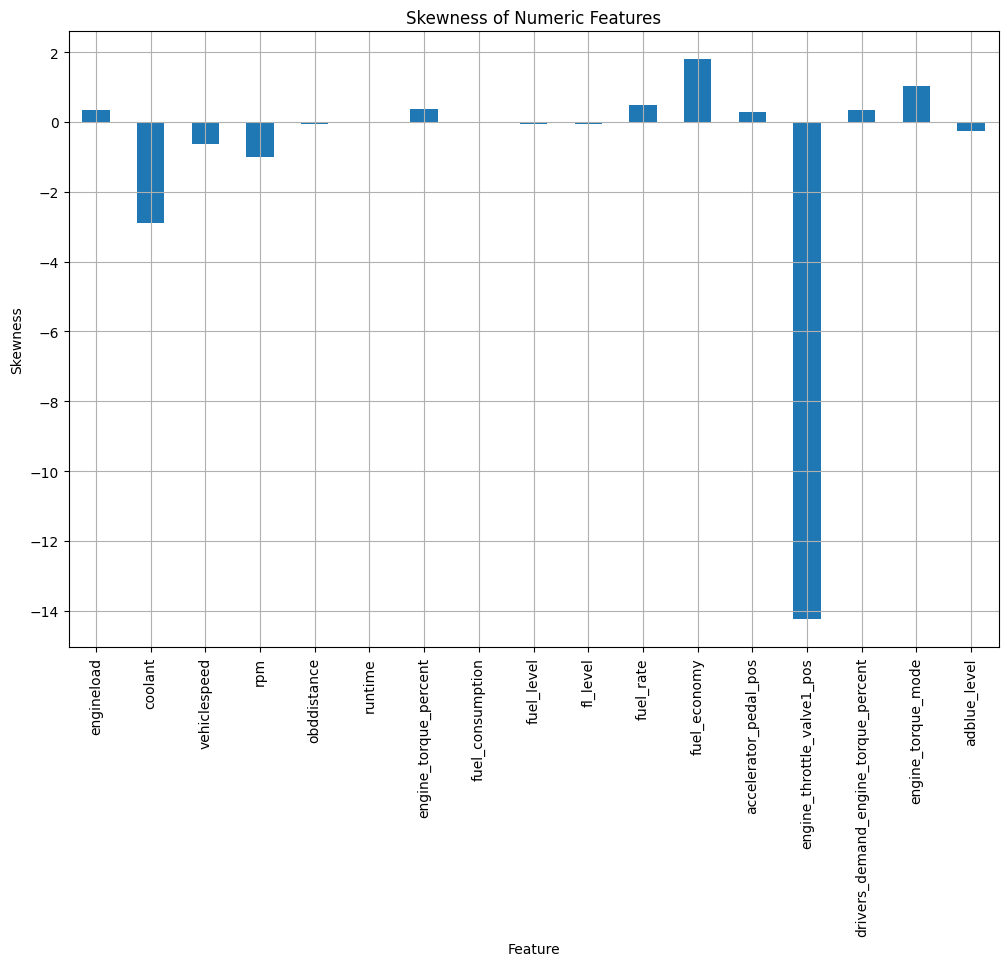

In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with numeric columns
numeric_columns = [
    'engineload', 'coolant', 'vehiclespeed', 'rpm', 'obddistance', 'runtime',
    'engine_torque_percent', 'fuel_consumption', 'fuel_level', 'fl_level',
    'fuel_rate', 'fuel_economy', 'accelerator_pedal_pos', 'engine_throttle_valve1_pos',
    'drivers_demand_engine_torque_percent', 'engine_torque_mode', 'adblue_level'
]

# Compute skewness for each numeric column
skewness = data[numeric_columns].skew()

# Print skewness values
print("Skewness of each feature:")
print(skewness)

# Plot skewness for each feature
plt.figure(figsize=(12, 8))
skewness.plot(kind='bar')
plt.title('Skewness of Numeric Features')
plt.xlabel('Feature')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [464]:
import numpy as np
from scipy import stats

# Apply log transformation (add 1 to avoid log(0) issues)
data['fuel_economy'] = np.log1p(data['fuel_economy'])
data['coolant'], _ = stats.boxcox(data['coolant'] + 1) 
data['engine_throttle_valve1_pos'], _ = stats.boxcox(data['engine_throttle_valve1_pos'])
data['engine_torque_mode'] = np.log1p(data['engine_torque_mode'])
# data_cleaned['rpm'] = np.sqrt(data_cleaned['rpm'])
data['rpm'], _ = stats.boxcox(data['rpm'] + 1) 


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_optimize.py:2488: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)
c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1259: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1271: RuntimeWarning: overflow encountered in scalar power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


Skewness of each feature:
engineload                              0.344900
coolant                                -0.032083
vehiclespeed                           -0.627619
rpm                                    -0.881245
obddistance                            -0.047455
runtime                                -0.031916
engine_torque_percent                   0.369125
fuel_consumption                       -0.033921
fuel_level                             -0.067748
fl_level                               -0.067748
fuel_rate                               0.496901
fuel_economy                            0.765574
accelerator_pedal_pos                   0.277265
engine_throttle_valve1_pos                   NaN
drivers_demand_engine_torque_percent    0.330915
engine_torque_mode                      0.681001
adblue_level                           -0.261489
dtype: float64


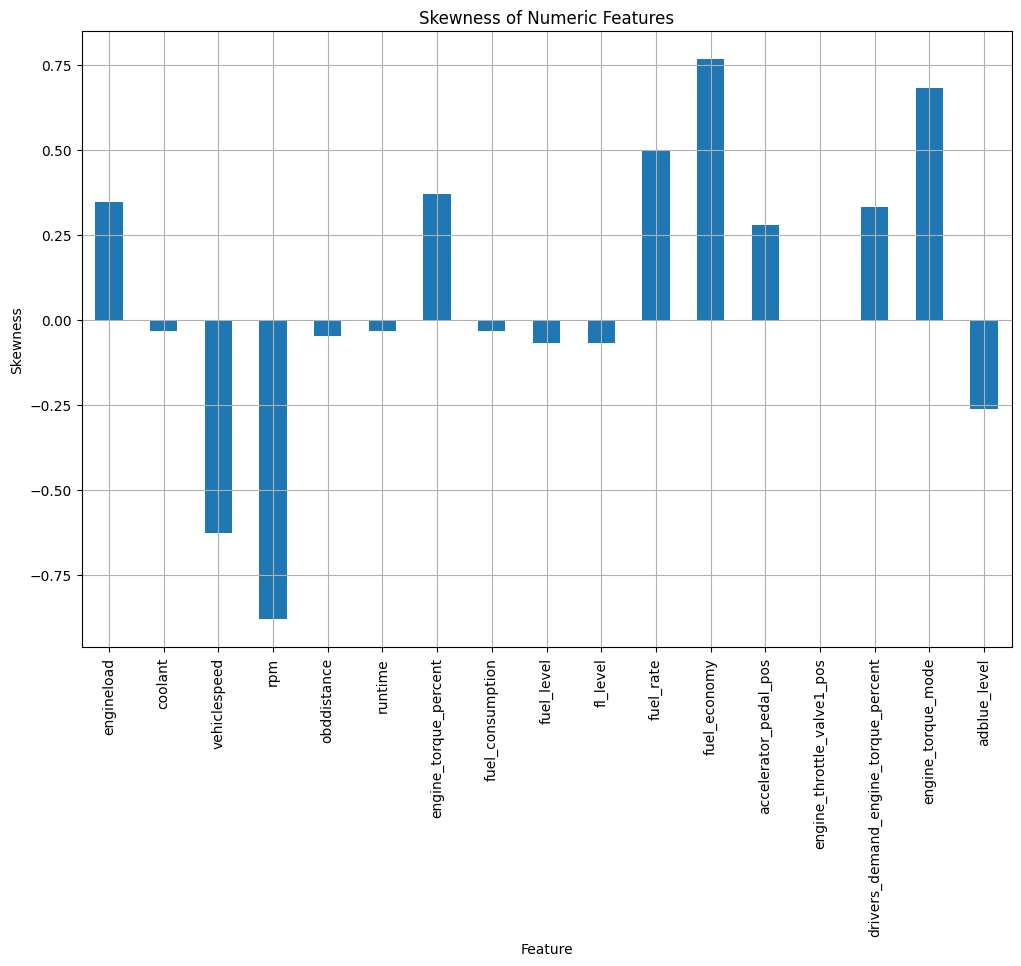

In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with numeric columns
numeric_columns = [
    'engineload', 'coolant', 'vehiclespeed', 'rpm', 'obddistance', 'runtime',
    'engine_torque_percent', 'fuel_consumption', 'fuel_level', 'fl_level',
    'fuel_rate', 'fuel_economy', 'accelerator_pedal_pos', 'engine_throttle_valve1_pos',
    'drivers_demand_engine_torque_percent', 'engine_torque_mode', 'adblue_level'
]

# Compute skewness for each numeric column
skewness = data[numeric_columns].skew()

# Print skewness values
print("Skewness of each feature:")
print(skewness)

# Plot skewness for each feature
plt.figure(figsize=(12, 8))
skewness.plot(kind='bar')
plt.title('Skewness of Numeric Features')
plt.xlabel('Feature')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18418 entries, 0 to 18433
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ts                                    18418 non-null  datetime64[ns]
 1   lat                                   18418 non-null  float64       
 2   lng                                   18418 non-null  float64       
 3   engineload                            18418 non-null  int64         
 4   coolant                               18418 non-null  float64       
 5   vehiclespeed                          18418 non-null  float64       
 6   rpm                                   18418 non-null  float64       
 7   obddistance                           18418 non-null  int64         
 8   runtime                               18418 non-null  float64       
 9   engine_torque_percent                 18418 non-null  int64         
 10  cur

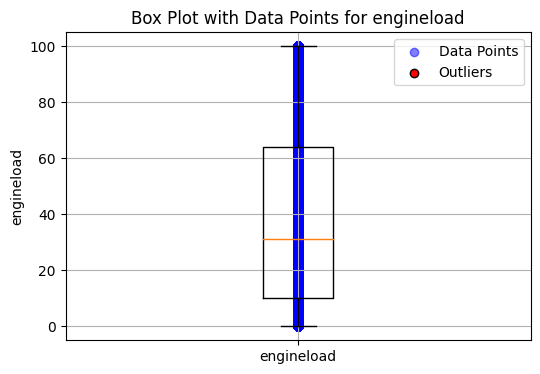

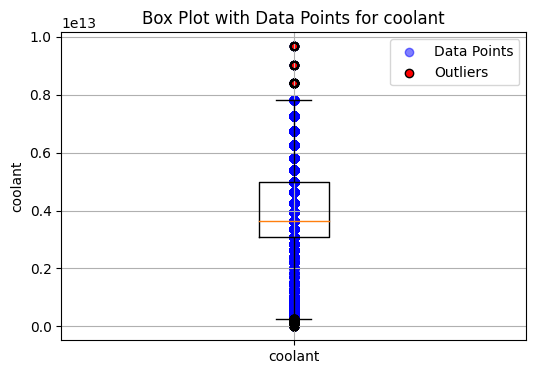

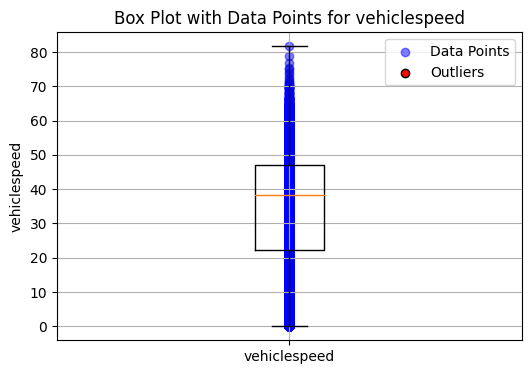

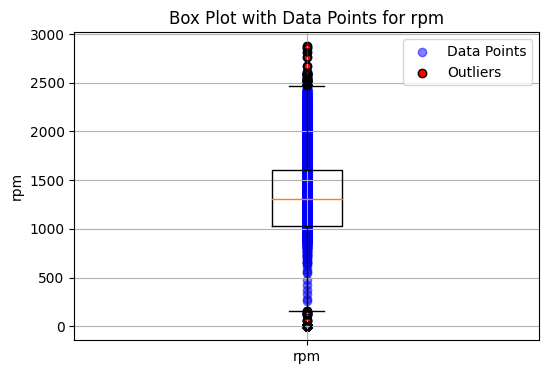

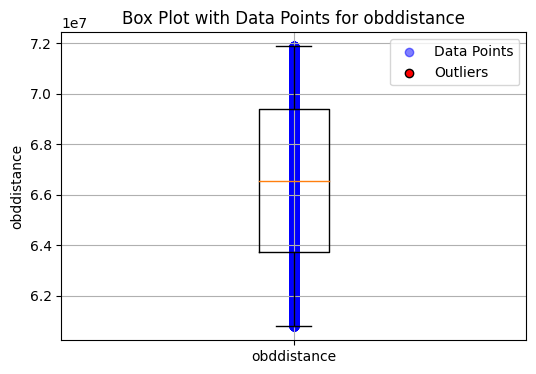

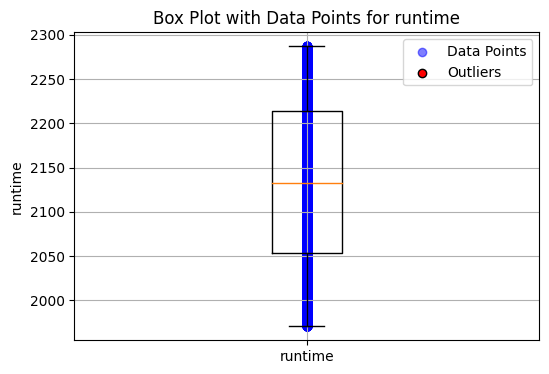

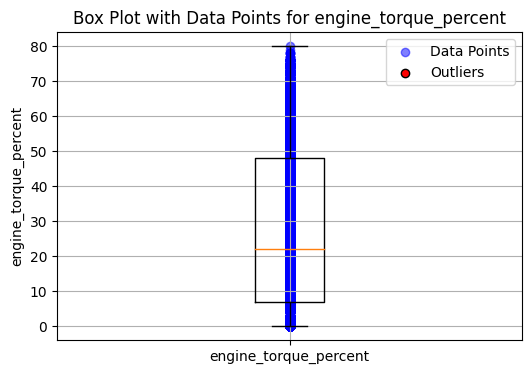

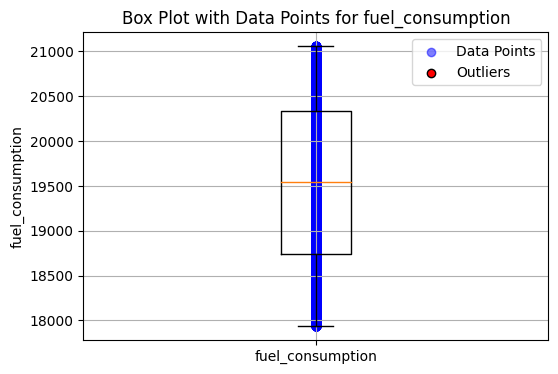

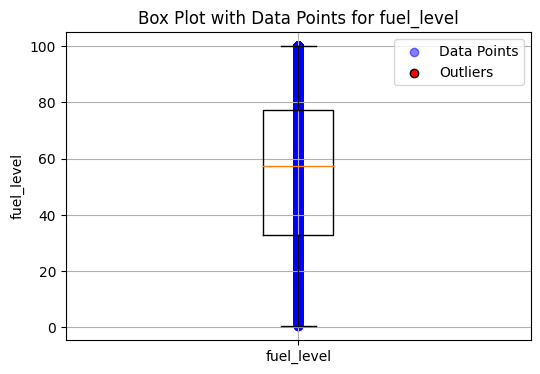

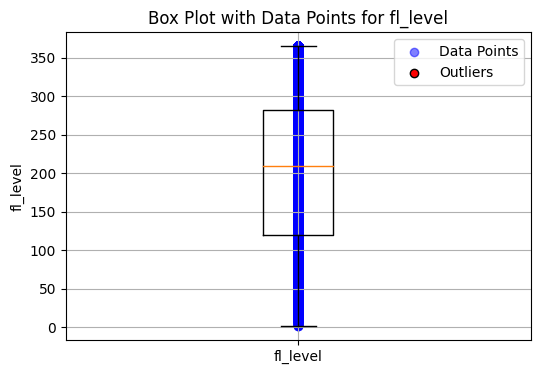

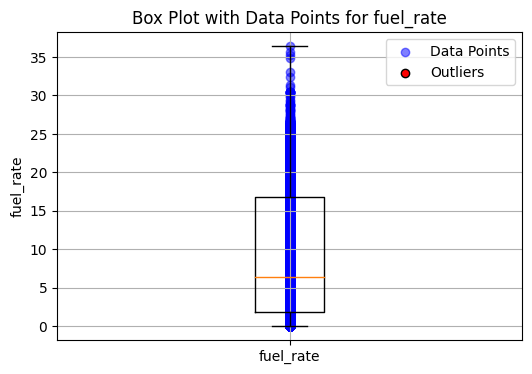

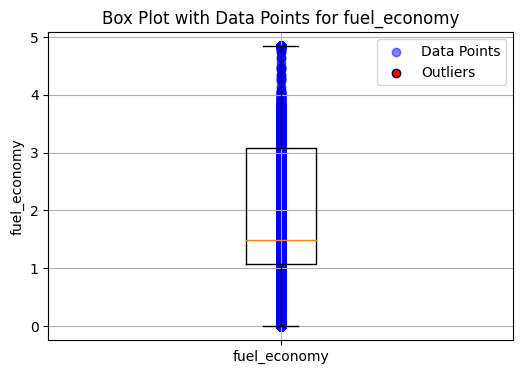

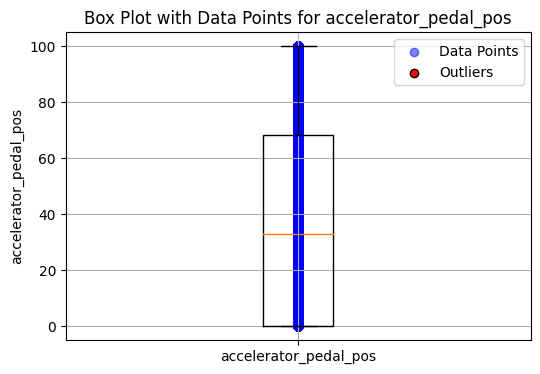

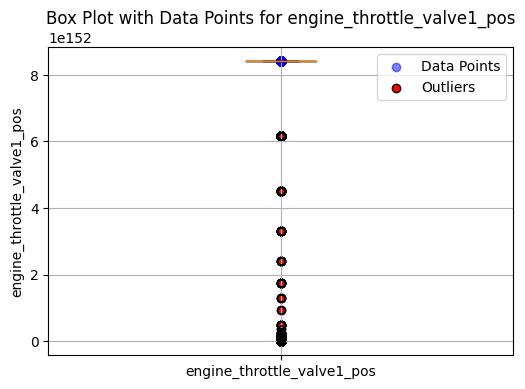

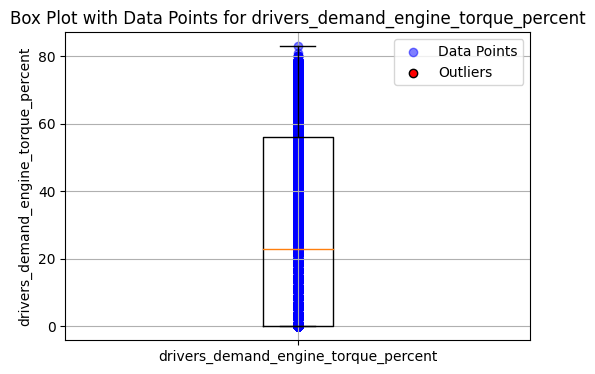

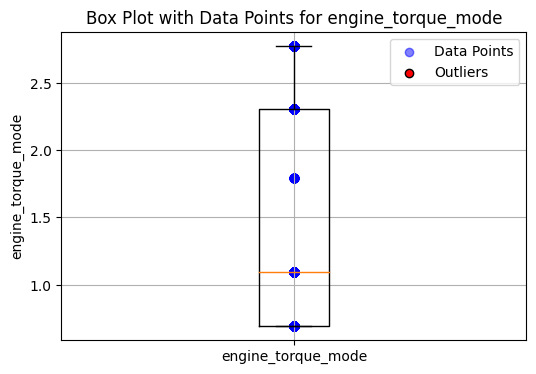

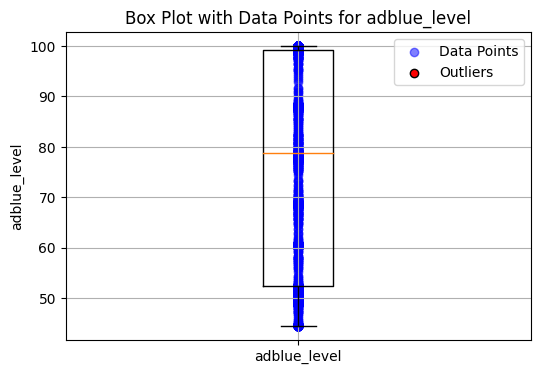

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the numeric columns
numeric_columns = [
    'engineload', 'coolant','vehiclespeed','rpm', 'obddistance', 'runtime', 
    'engine_torque_percent', 'fuel_consumption', 'fuel_level', 'fl_level', 
    'fuel_rate', 'fuel_economy', 'accelerator_pedal_pos', 'engine_throttle_valve1_pos', 
    'drivers_demand_engine_torque_percent', 'engine_torque_mode', 'adblue_level'
]

# Example of handling outliers for each numeric column
for column in numeric_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a box plot
    plt.figure(figsize=(6, 4))
    
    # Plot box plot
    plt.boxplot(data[column].dropna(), flierprops=dict(marker='o', color='red', markersize=5))
    
    # Overlay scatter plot of all data points
    plt.scatter(np.ones_like(data[column].dropna()), data[column].dropna(), alpha=0.5, color='blue', label='Data Points')

    # Overlay scatter plot of outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    plt.scatter(np.ones_like(outliers[column]), outliers[column], color='red', label='Outliers', edgecolor='black')

    # Set plot labels and title
    plt.title(f'Box Plot with Data Points for {column}')
    plt.ylabel(column)
    plt.xticks([1], [column])  # Set x-tick to show the column name
    plt.legend()
    plt.grid(True)
    
    plt.show()
    
  




In [468]:
# Remove outliers for each numeric column
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


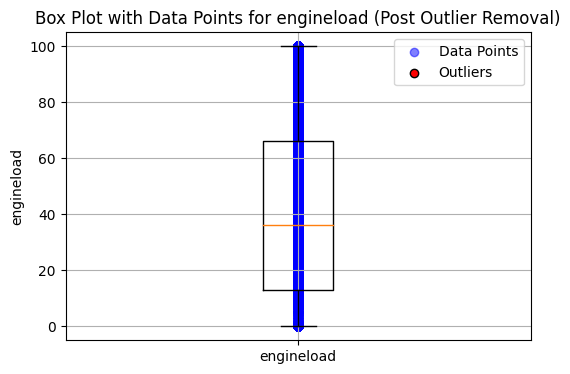

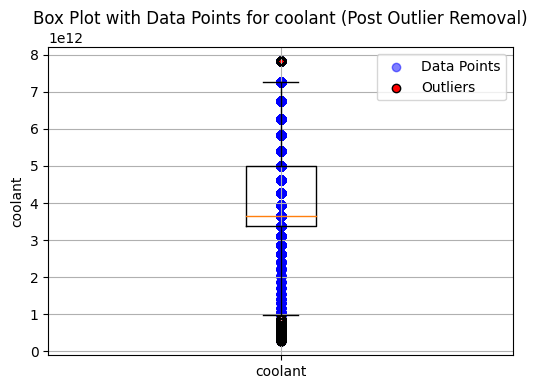

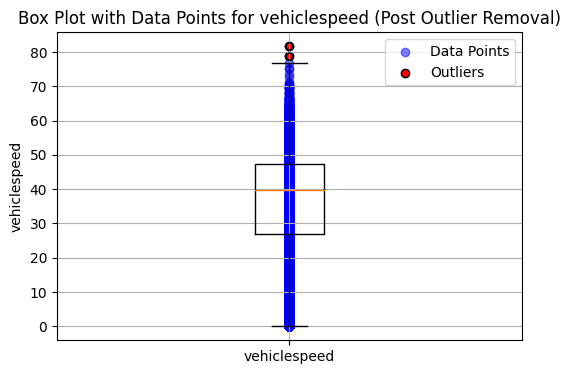

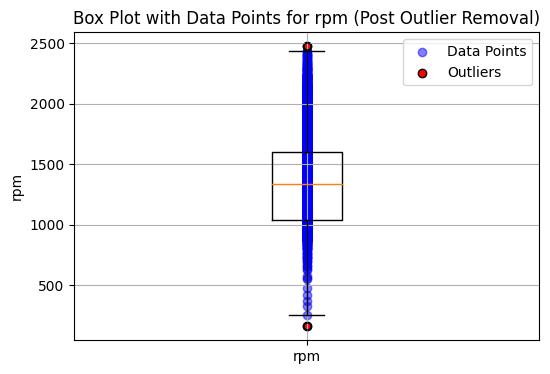

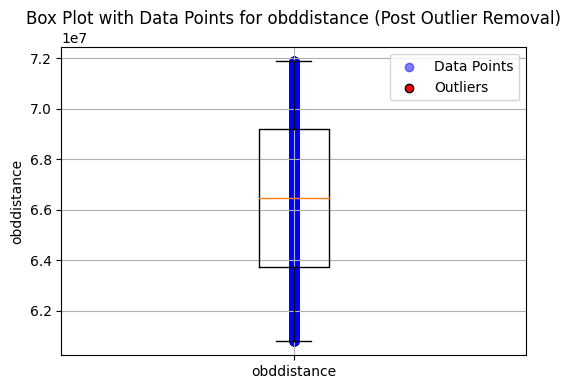

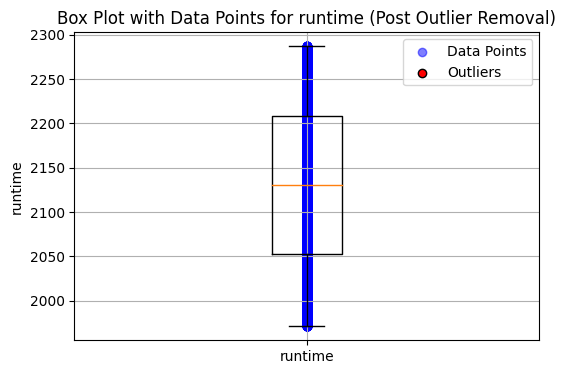

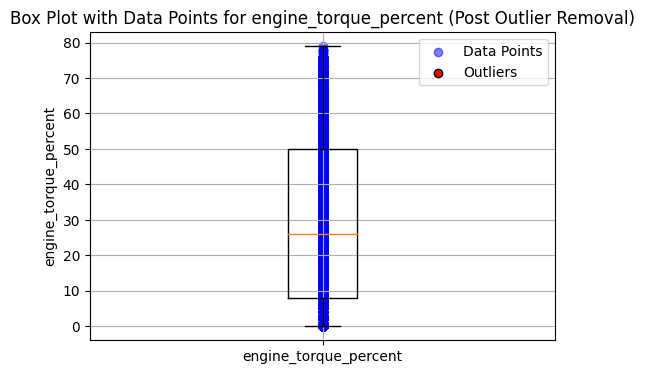

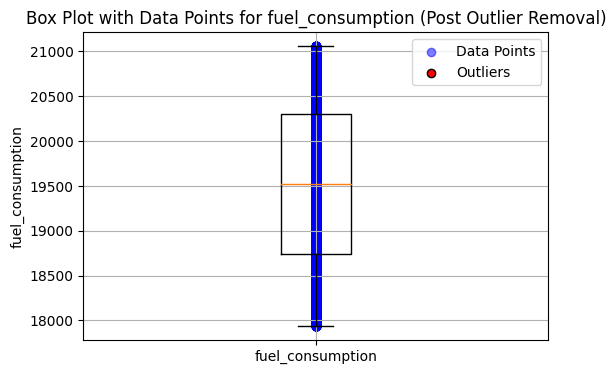

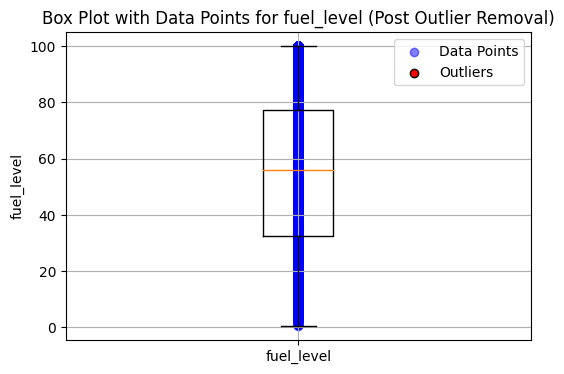

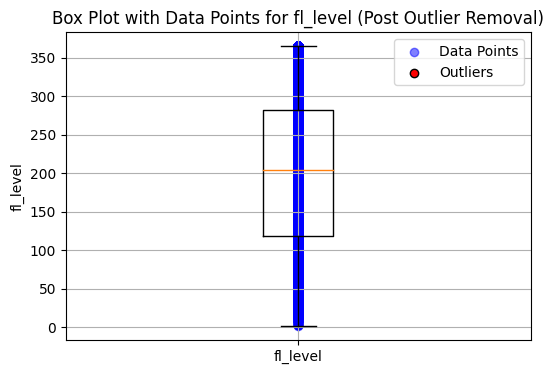

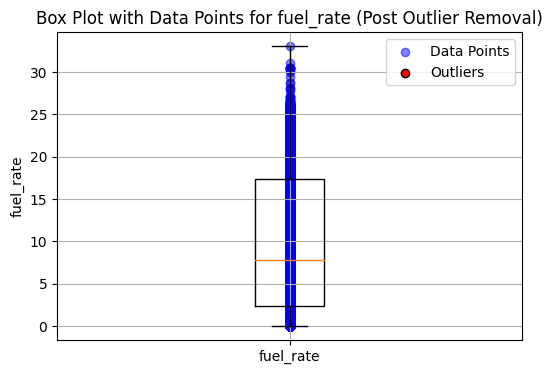

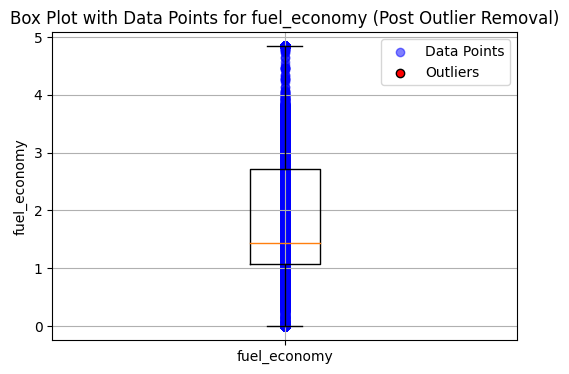

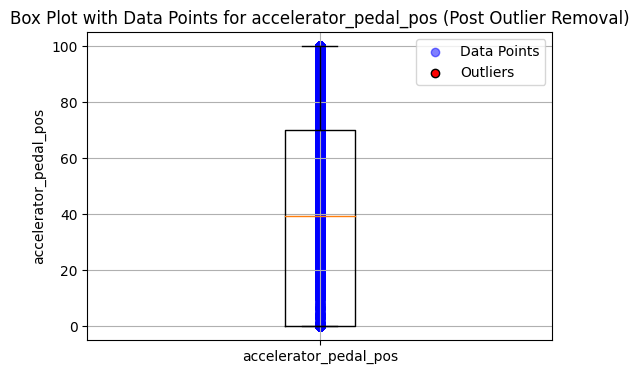

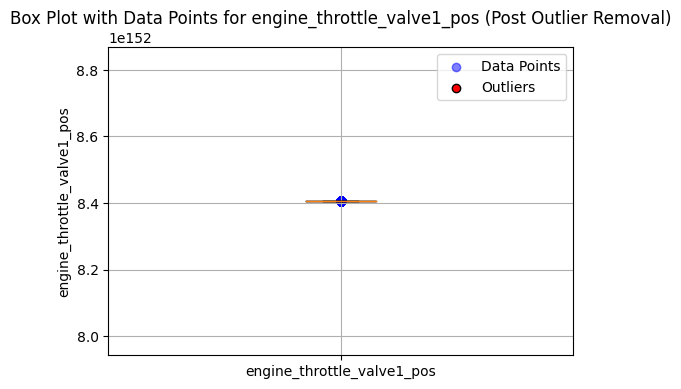

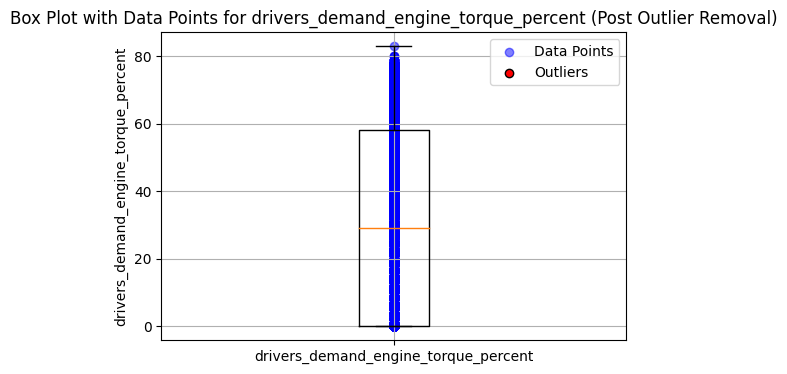

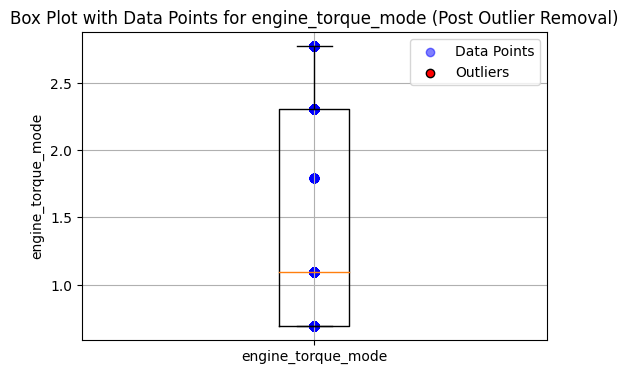

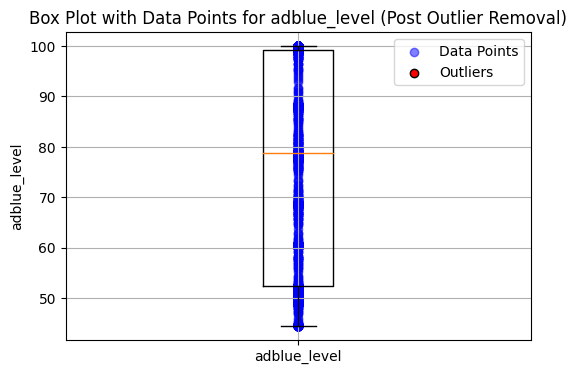

In [469]:
# Re-plot box plots to confirm removal of outliers
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plot box plot with data points and outliers
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[column].dropna(), flierprops=dict(marker='o', color='red', markersize=5))
    plt.scatter(np.ones_like(data[column].dropna()), data[column].dropna(), alpha=0.5, color='blue', label='Data Points')

    # Re-calculate outliers to confirm removal
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    plt.scatter(np.ones_like(outliers[column]), outliers[column], color='red', label='Outliers', edgecolor='black')

    plt.title(f'Box Plot with Data Points for {column} (Post Outlier Removal)')
    plt.ylabel(column)
    plt.xticks([1], [column])
    plt.legend()
    plt.grid(True)
    plt.show()


In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 32 to 18433
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ts                                    15586 non-null  datetime64[ns]
 1   lat                                   15586 non-null  float64       
 2   lng                                   15586 non-null  float64       
 3   engineload                            15586 non-null  int64         
 4   coolant                               15586 non-null  float64       
 5   vehiclespeed                          15586 non-null  float64       
 6   rpm                                   15586 non-null  float64       
 7   obddistance                           15586 non-null  int64         
 8   runtime                               15586 non-null  float64       
 9   engine_torque_percent                 15586 non-null  int64         
 10  cu

In [471]:
data.isnull().sum()

ts                                      0
lat                                     0
lng                                     0
engineload                              0
coolant                                 0
vehiclespeed                            0
rpm                                     0
obddistance                             0
runtime                                 0
engine_torque_percent                   0
current_gear                            0
fuel_consumption                        0
fuel_level                              0
fl_level                                0
fuel_rate                               0
fuel_economy                            0
accelerator_pedal_pos                   0
engine_throttle_valve1_pos              0
drivers_demand_engine_torque_percent    0
engine_torque_mode                      0
brake_switch_status                     0
clutch_switch_status                    0
parking_switch_status                   0
adblue_level                      

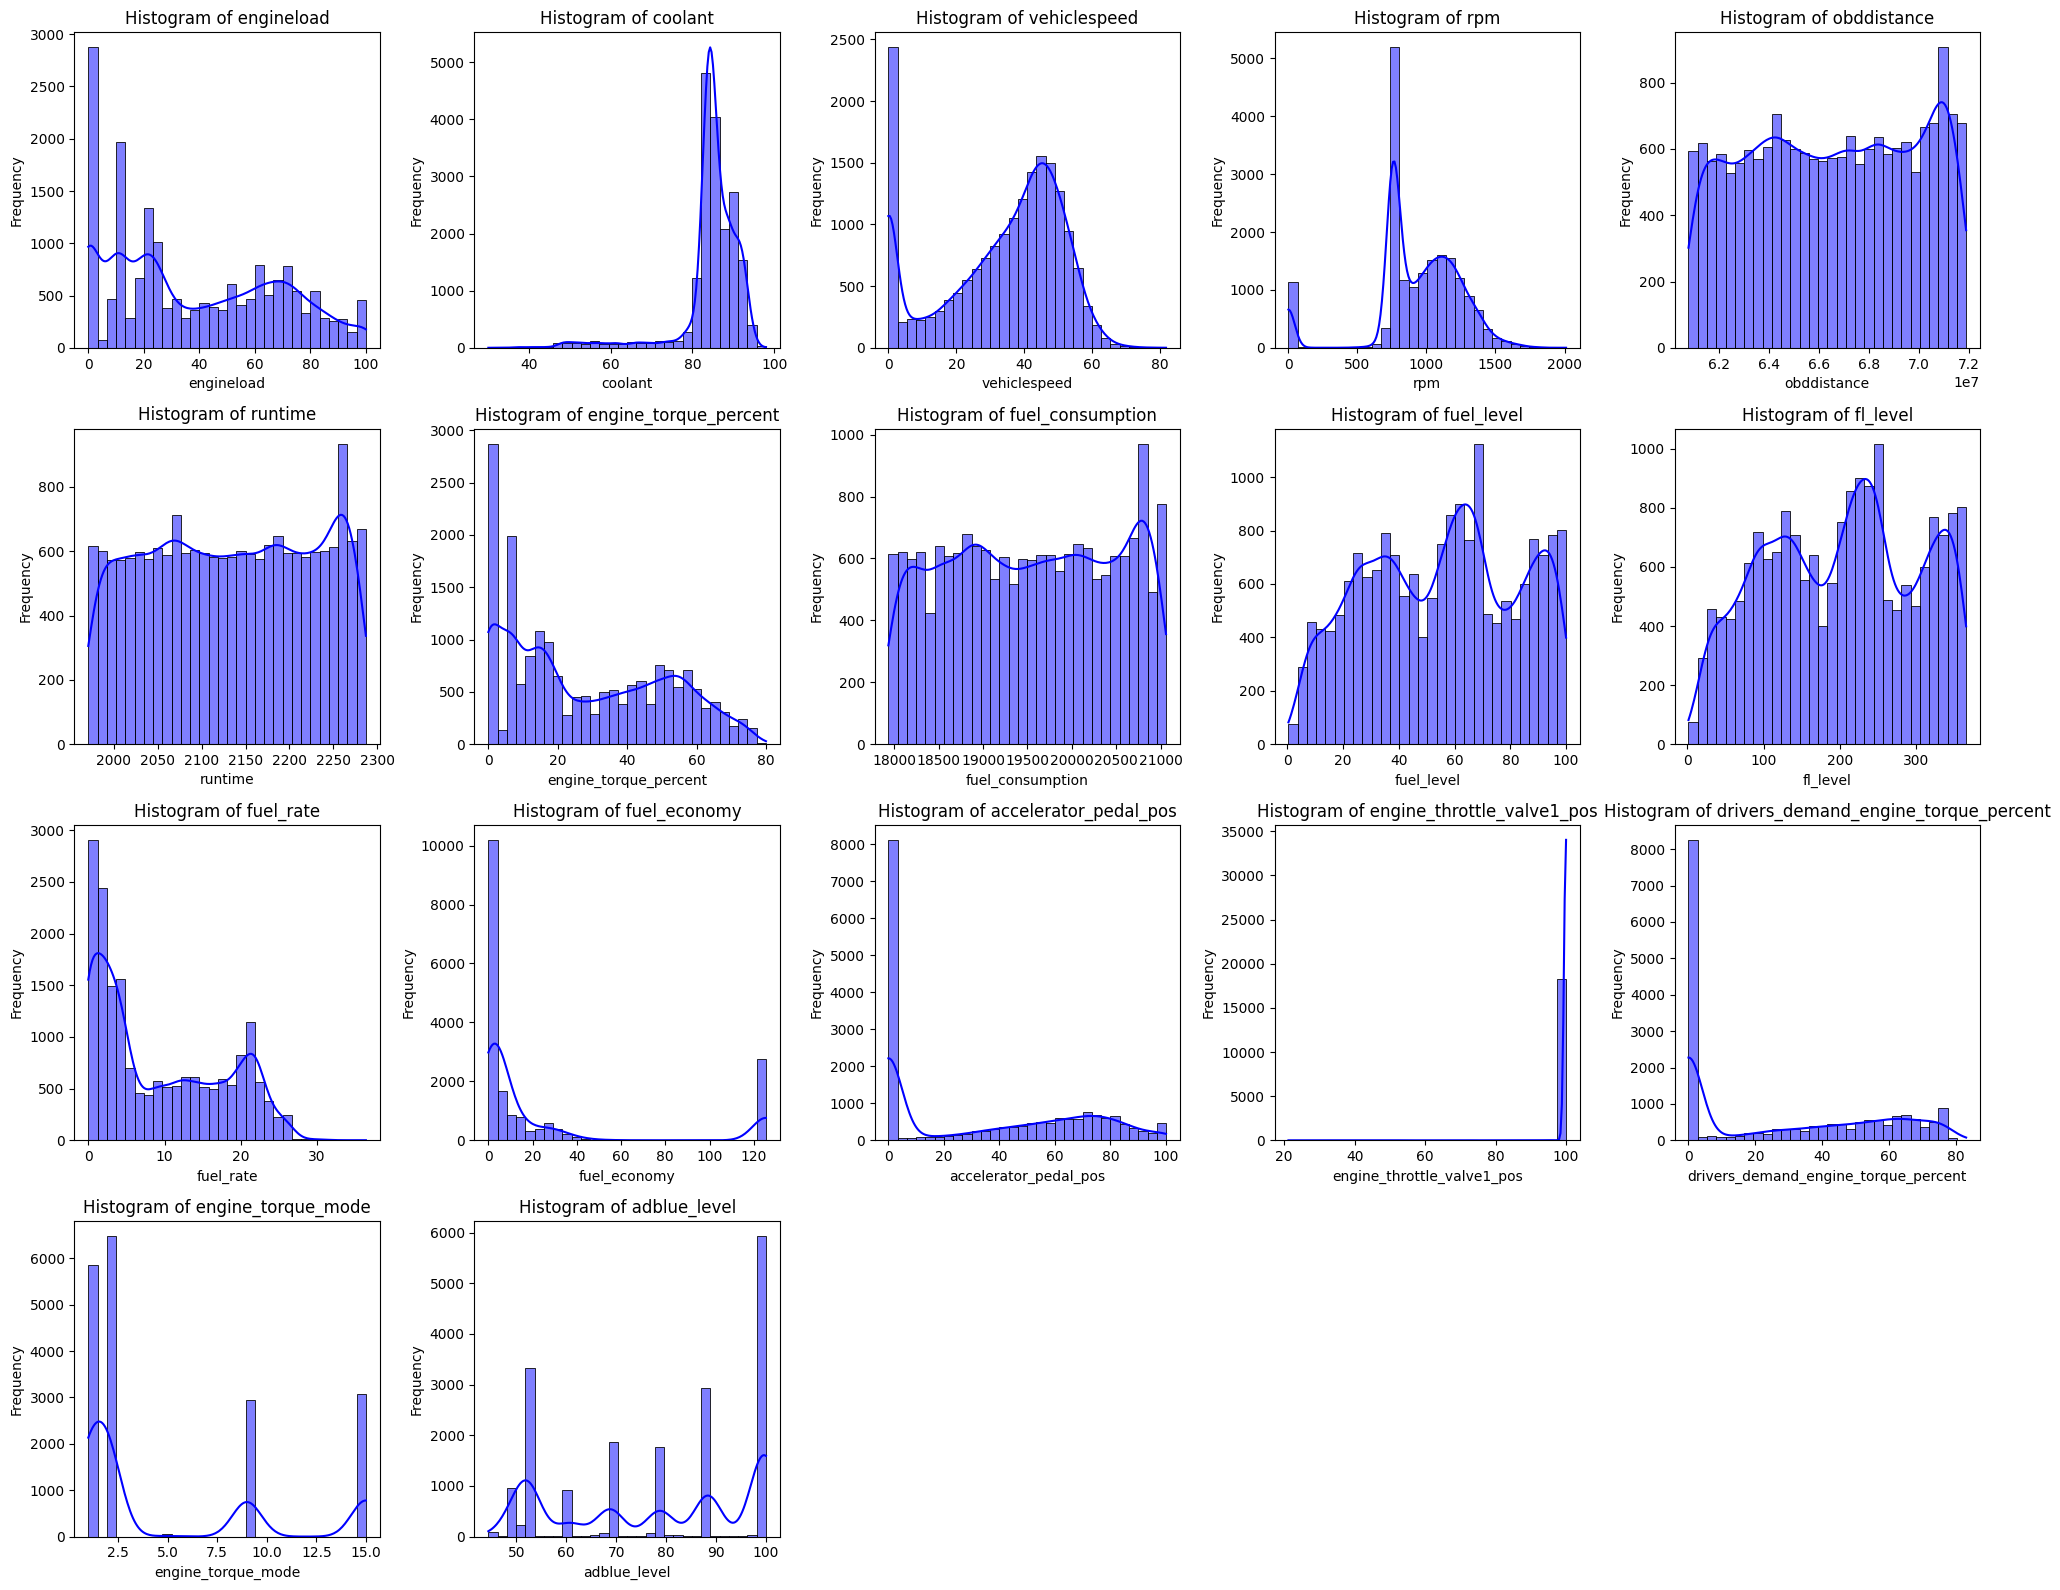

In [474]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns for histogram plotting
numeric_columns = [
    'engineload', 'coolant', 'vehiclespeed', 'rpm', 'obddistance', 'runtime', 
    'engine_torque_percent', 'fuel_consumption', 'fuel_level', 'fl_level', 
    'fuel_rate', 'fuel_economy', 'accelerator_pedal_pos', 'engine_throttle_valve1_pos', 
    'drivers_demand_engine_torque_percent', 'engine_torque_mode', 'adblue_level'
]

# Ensure no null values in the dataset
data = data[numeric_columns].dropna()

# Plot histograms for each numeric column
plt.figure(figsize=(20, 16))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


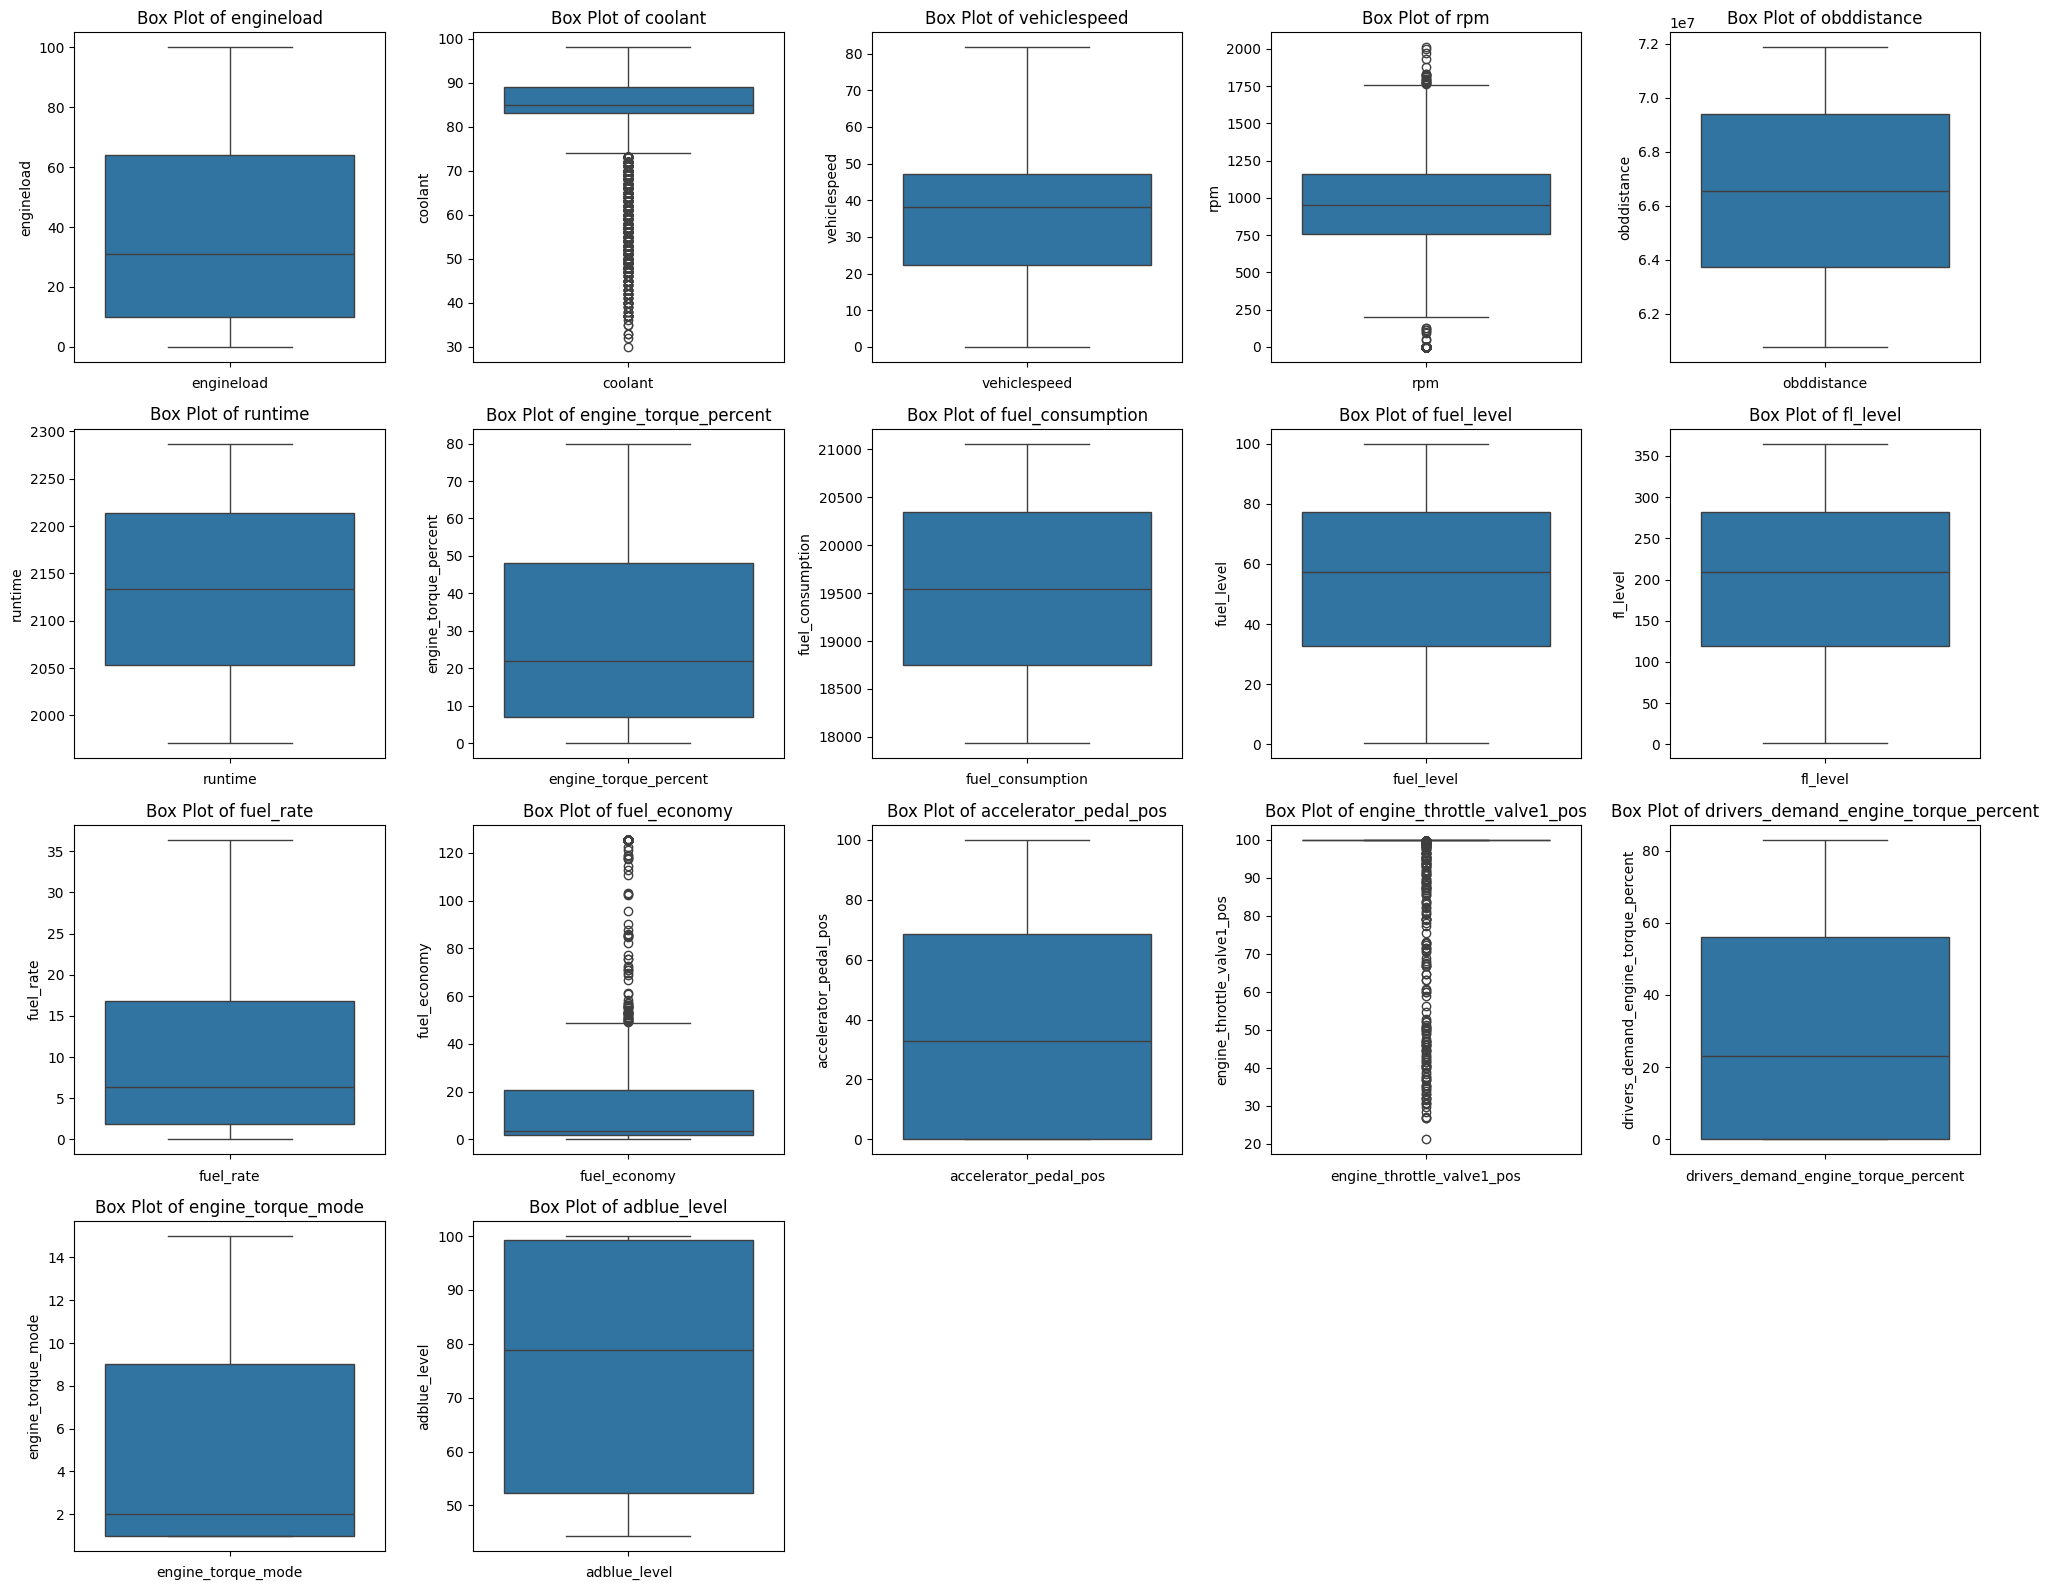

In [484]:
# Plot box plots for each numeric column
plt.figure(figsize=(20, 16))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


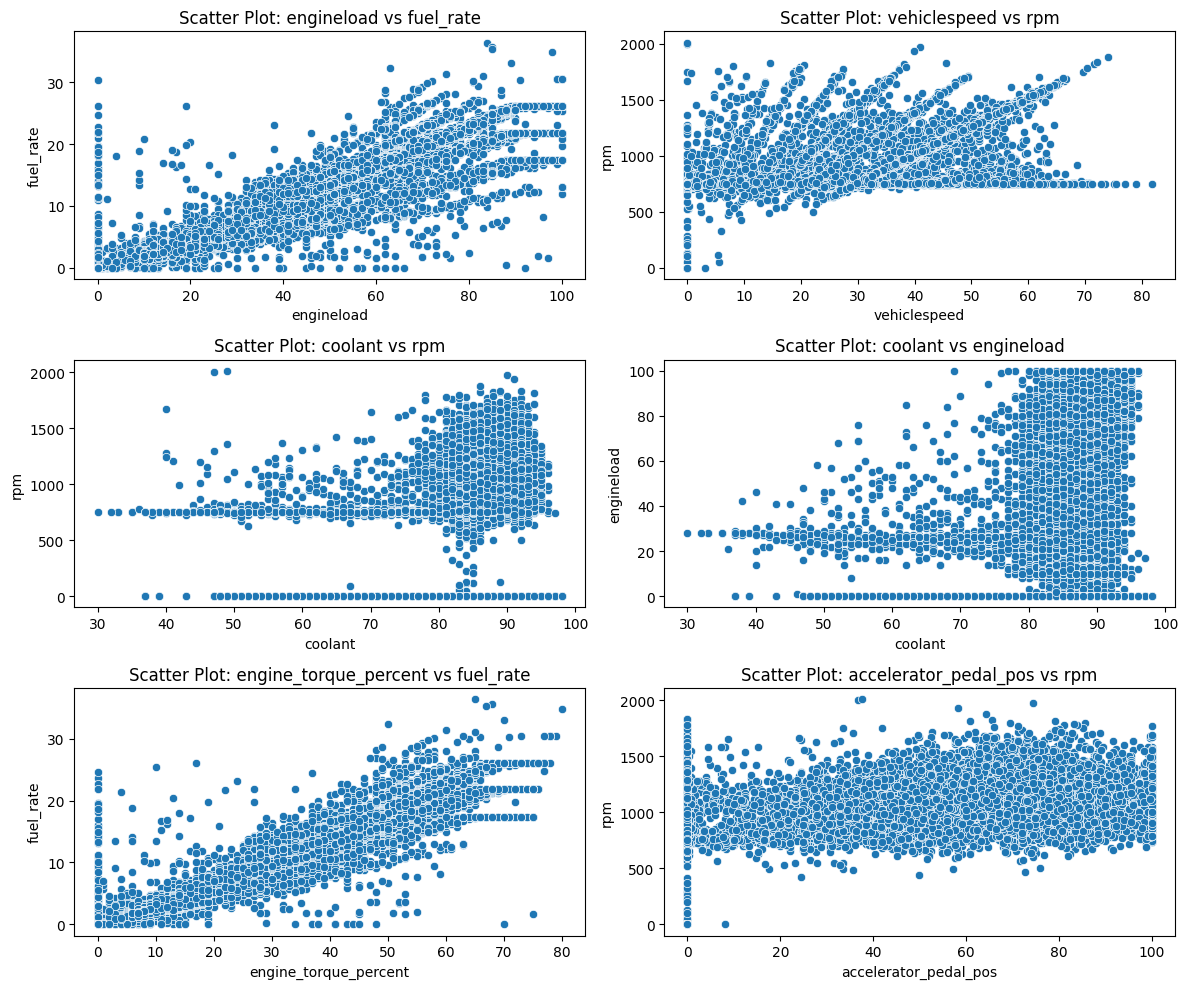

In [481]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of pairs of columns to analyze
pairs_to_plot = [
    ('engineload', 'fuel_rate'),
    ('vehiclespeed', 'rpm'),
    ('coolant', 'rpm'),
    ('coolant','engineload'),
    ('engine_torque_percent', 'fuel_rate'),
    ('accelerator_pedal_pos','rpm')
]

# Plot scatter plots for each pair
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
for i, (x_col, y_col) in enumerate(pairs_to_plot, 1):
    plt.subplot(3, 2, i)  # Change to a 3x2 grid
    sns.scatterplot(x=data[x_col], y=data[y_col])
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.show()


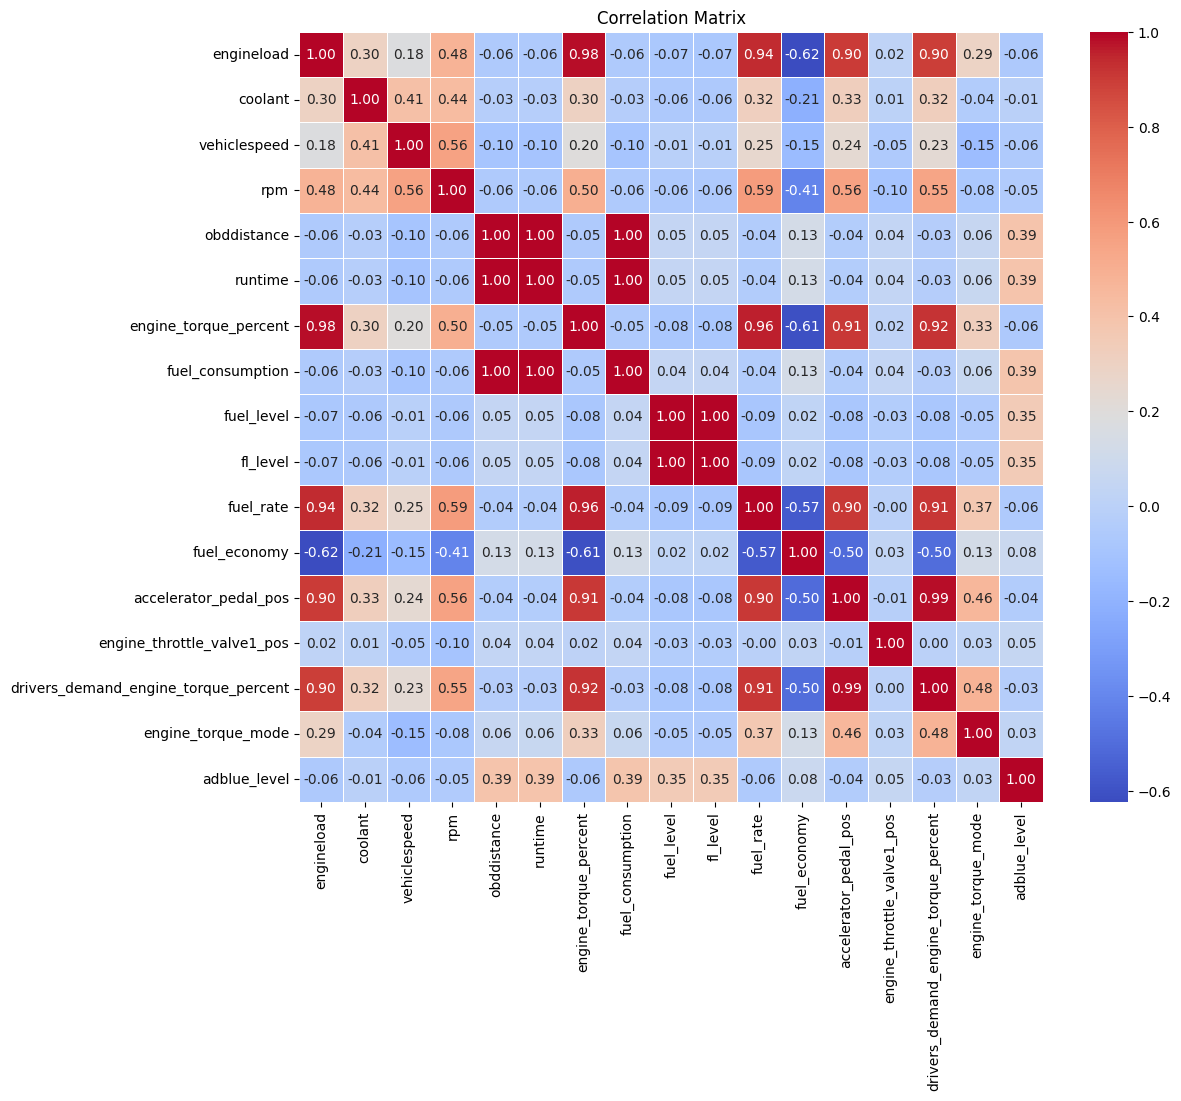

In [482]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


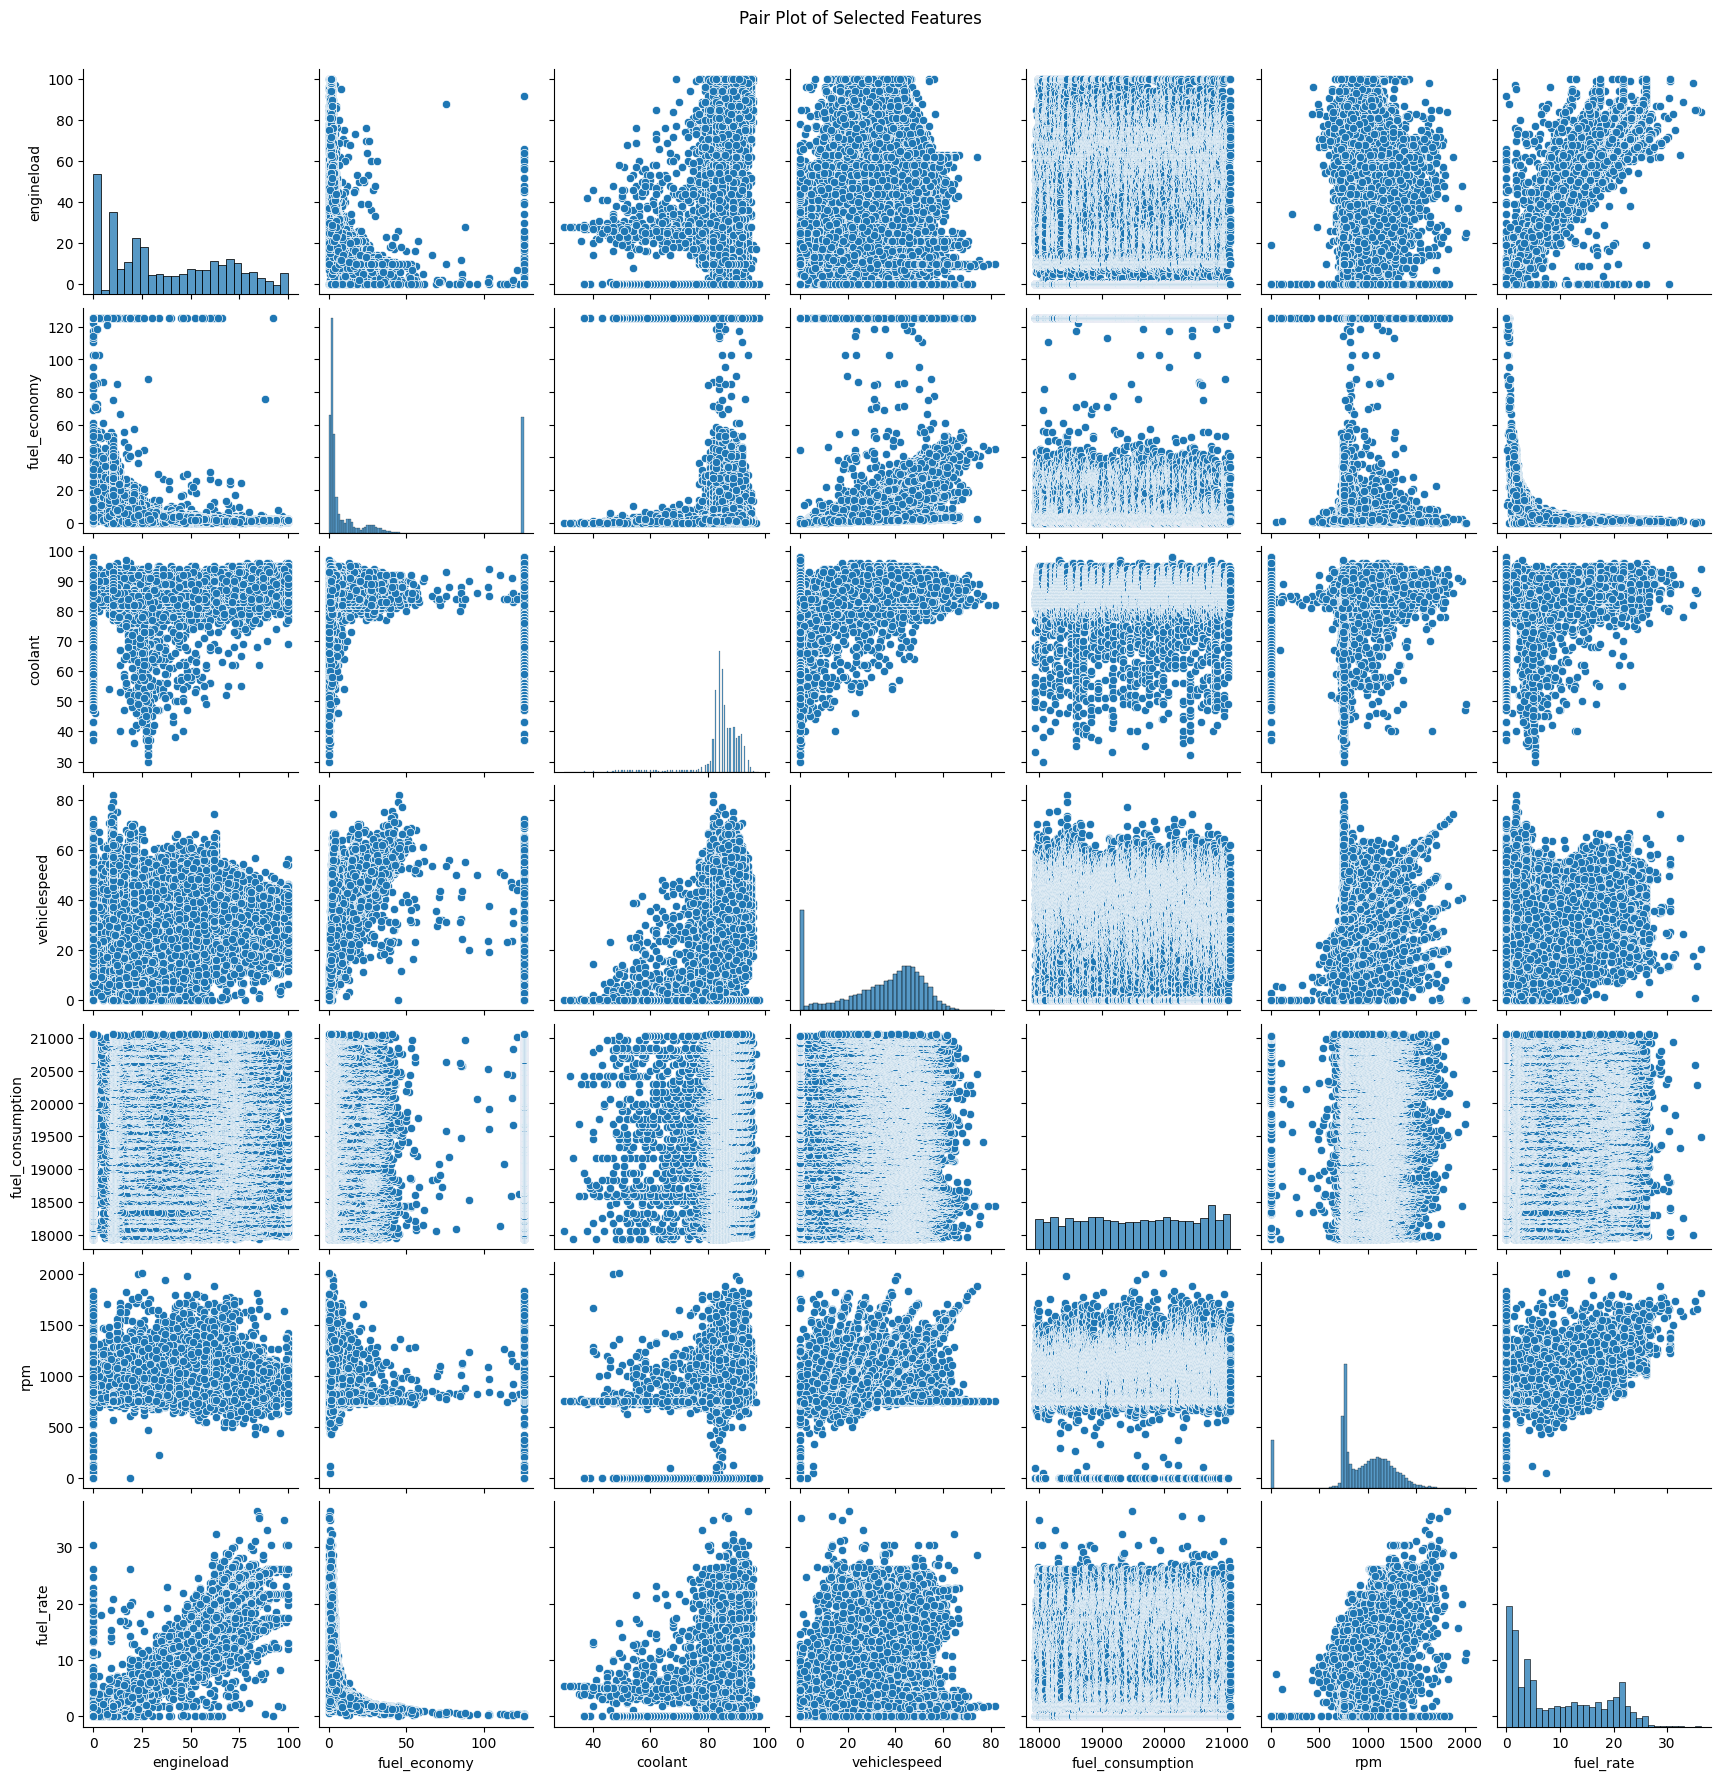

In [486]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected important features for the pair plot
selected_features = [
    'engineload', 'fuel_economy', 'coolant', 'vehiclespeed', 
    'fuel_consumption', 'rpm', 'fuel_rate'
]

# Create a pair plot of the selected features
sns.pairplot(data[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


In [487]:
#feature engineering
data['torque_fuel_interaction'] = data['engine_torque_percent'] * data['fuel_consumption']
data['torque_fuel_interaction'].head()


0    376645.5
1    322839.0
2    322848.0
3    484272.0
4     17936.0
Name: torque_fuel_interaction, dtype: float64

In [488]:
data['total_runtime'] = data.groupby(data['ts'].dt.date)['runtime'].transform('sum')
data['total_runtime']

KeyError: 'ts'

In [489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18418 entries, 0 to 18433
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   engineload                            18418 non-null  int64  
 1   coolant                               18418 non-null  int64  
 2   vehiclespeed                          18418 non-null  float64
 3   rpm                                   18418 non-null  float64
 4   obddistance                           18418 non-null  int64  
 5   runtime                               18418 non-null  float64
 6   engine_torque_percent                 18418 non-null  int64  
 7   fuel_consumption                      18418 non-null  float64
 8   fuel_level                            18418 non-null  float64
 9   fl_level                              18418 non-null  float64
 10  fuel_rate                             18418 non-null  float64
 11  fuel_economy        